In [11]:
import os
import json
import logging
import numpy as np
import goodman_pipeline
from astropy.io import fits

from ccdproc import CCDData

from goodman_pipeline.spectroscopy import WavelengthCalibration
from goodman_pipeline.core import add_wcs_keys, write_fits

log = logging.getLogger(__name__)

wc = WavelengthCalibration()

ccd = CCDData(data=np.random.random_sample(200),
              meta=fits.Header(),
              unit='adu')

ccd = add_wcs_keys(ccd=ccd)
ccd.header.set('SLIT',
               value='1.0_LONG_SLIT',
               comment="slit [arcsec]")
ccd.header.set('GSP_FNAM',
               value='some_name.fits',
               comment='Name of the current file')
ccd.header.set('OBSTYPE',
               value='SPECTRUM',
               comment='Obstype')
ccd.header.set('OBJECT',
               value='An X Object',
               comment='Some random object name')
ccd.header.set('GSP_FLAT',
               value='some_flat_file.fits',
               comment='The name of the flat')
ccd.header.set('CCDSUM',
               value='1 1',
               comment='Binning')
ccd.header.set('WAVMODE',
               value='400 M1',
               comment='wavmode')

lamp = ccd.copy()
lamp.header.set('OBSTYPE',
                value='COMP',
                comment='Comparison lamp obstype')
lamp.header.set('OBJECT', value='HgArNe')



In [21]:
print(goodman_pipeline.__version__)

1.3.4


In [17]:
reference_path = os.path.join(os.path.dirname(goodman_pipeline.__file__), 'data/ref_comp')
print(reference_path)

/home/simon/.local/lib/python3.8/site-packages/goodman_pipeline/data/ref_comp


In [19]:
!ls /home/simon/.local/lib/python3.8/site-packages/goodman_pipeline/data/ref_comp


goodman_comp_1200M1_Ar.fits	       goodman_comp_600Blue_HgAr.fits
goodman_comp_1200M1_CuHeAr.fits        goodman_comp_600Blue_HgArNe.fits
goodman_comp_1200M1_FeHeAr.fits        goodman_comp_600Mid_GG385_HgAr.fits
goodman_comp_1200M2_CuHeAr.fits        goodman_comp_600Mid_GG385_HgArNe.fits
goodman_comp_1200M2_FeHeAr.fits        goodman_comp_600Red_GG495_Ar.fits
goodman_comp_1200M3_CuHeAr.fits        goodman_comp_600Red_GG495_CuHeAr.fits
goodman_comp_1200M3_FeHeAr.fits        goodman_comp_600Red_GG495_FeHeAr.fits
goodman_comp_1200M4_GG455_CuHeAr.fits  goodman_comp_600Red_GG495_HgAr.fits
goodman_comp_1200M4_GG455_FeHeAr.fits  goodman_comp_600Red_GG495_HgArNe.fits
goodman_comp_1200M4_GG455_HgArNe.fits  goodman_comp_600Red_GG495_Ne.fits
goodman_comp_1200M4_GG455_Ne.fits      goodman_comp_600UV_CuHeAr.fits
goodman_comp_1200M5_GG455_Ar.fits      goodman_comp_600UV_HgAr.fits
goodman_comp_1200M5_GG455_CuHeAr.fits  goodman_comp_600UV_HgArNe.fits
goodman_comp_1200M5_GG455_FeHeAr.fits  goodman_com

/home/simon/.local/lib/python3.8/site-packages/goodman_pipeline/core/core.py:1548: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Lines Detected')


AttributeError: 'FigureManagerBase' object has no attribute 'window'

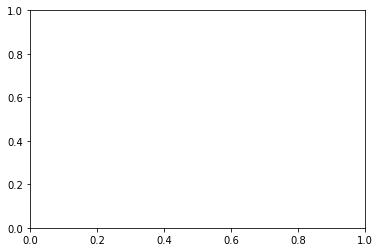

In [22]:
import json
json_output = wc(ccd=ccd,
                  comp_list=[lamp],
                  save_data_to='',
                  reference_data=reference_path,
                  json_output=True, plots=True)
print(json.dumps(json_output, indent=4))